# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import zscore

In [125]:
df = pd.read_csv('Wholesale_Data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [126]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


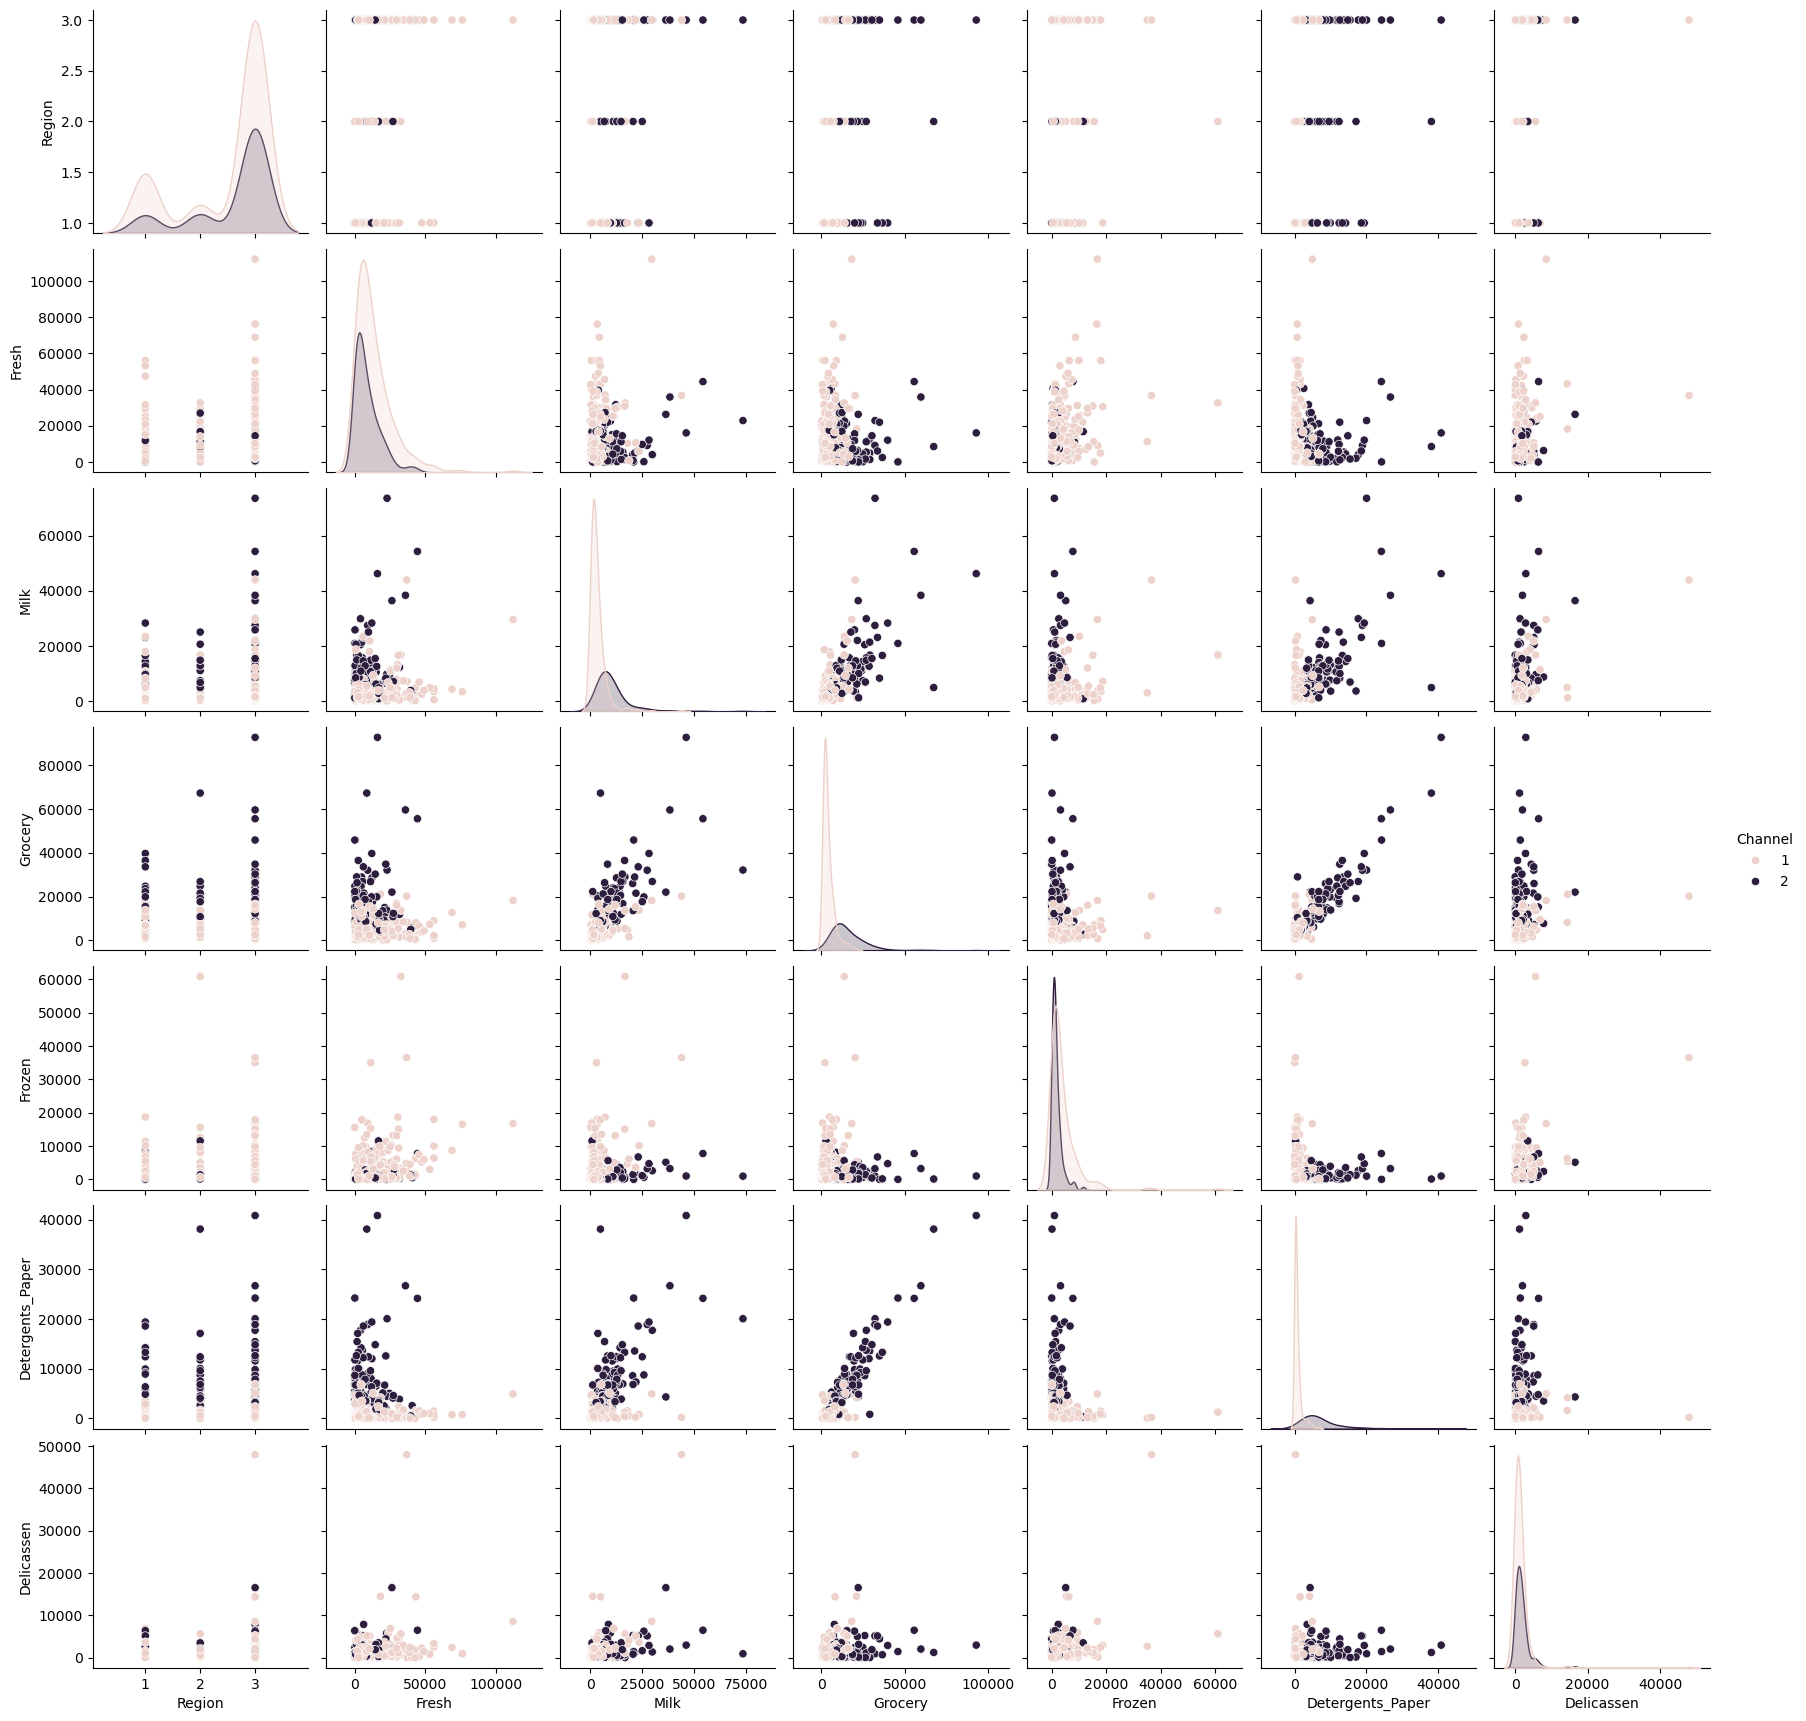

In [128]:
# Pairplot to check relationships between features, colored by 'Channel'
sns.pairplot(df, hue="Channel", diag_kind="kde")
plt.show()

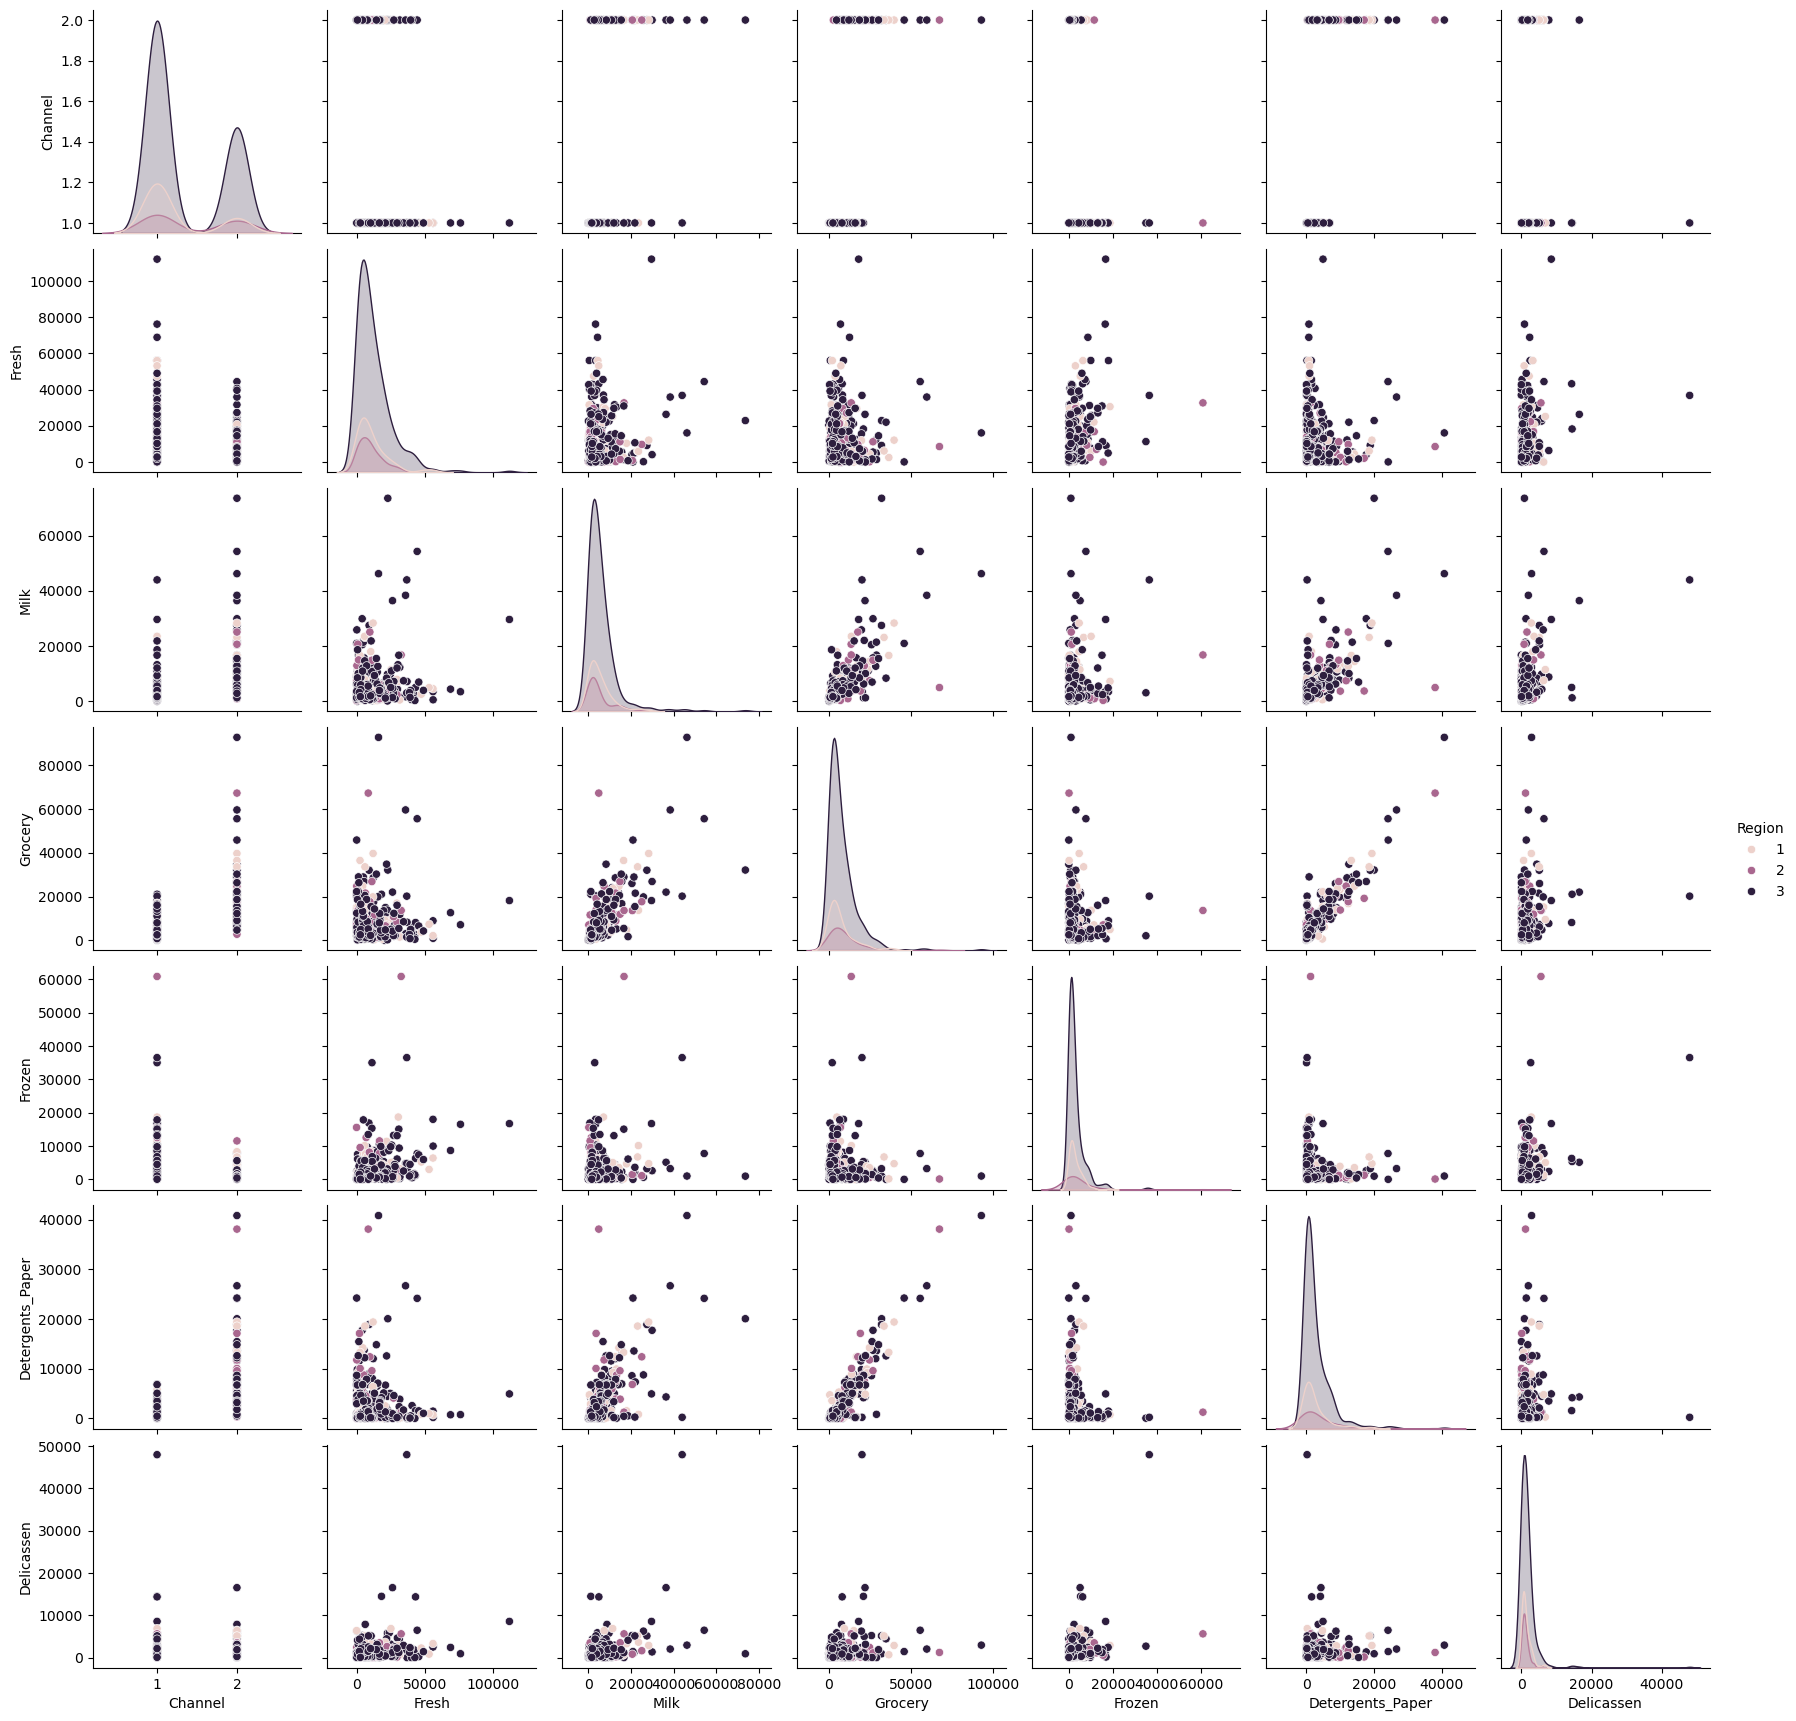

In [129]:
# Pairplot to check relationships between features, colored by 'Channel'
sns.pairplot(df, hue="Region", diag_kind="kde")
plt.show()

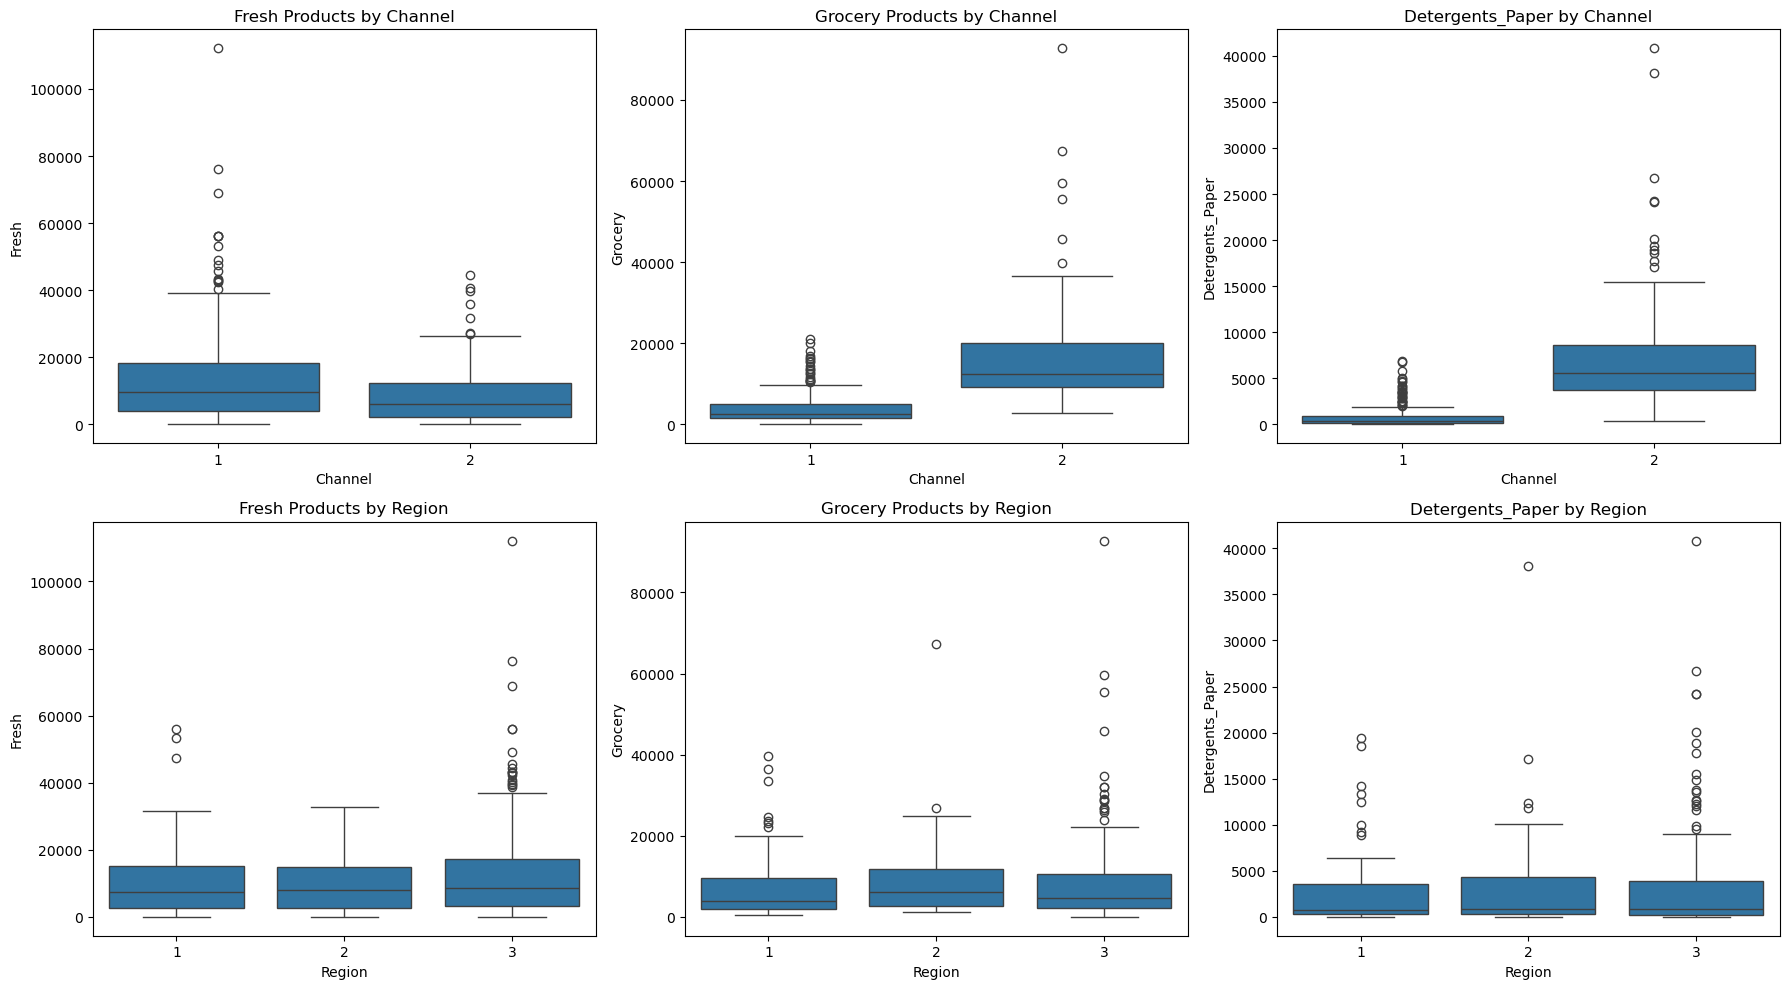

In [130]:
# Boxplots for spending patterns across categories by 'Channel' and 'Region'
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Fresh Product
sns.boxplot(x='Channel', y='Fresh', data=df, ax=axes[0, 0])
axes[0, 0].set_title("Fresh Products by Channel")
sns.boxplot(x='Region', y='Fresh', data=df, ax=axes[1, 0])
axes[1, 0].set_title("Fresh Products by Region")

# Grocery
sns.boxplot(x='Channel', y='Grocery', data=df, ax=axes[0, 1])
axes[0, 1].set_title("Grocery Products by Channel")
sns.boxplot(x='Region', y='Grocery', data=df, ax=axes[1, 1])
axes[1, 1].set_title("Grocery Products by Region")

# Detergents_Paper
sns.boxplot(x='Channel', y='Detergents_Paper', data=df, ax=axes[0, 2])
axes[0, 2].set_title("Detergents_Paper by Channel")
sns.boxplot(x='Region', y='Detergents_Paper', data=df, ax=axes[1, 2])
axes[1, 2].set_title("Detergents_Paper by Region")

plt.tight_layout()
plt.show()

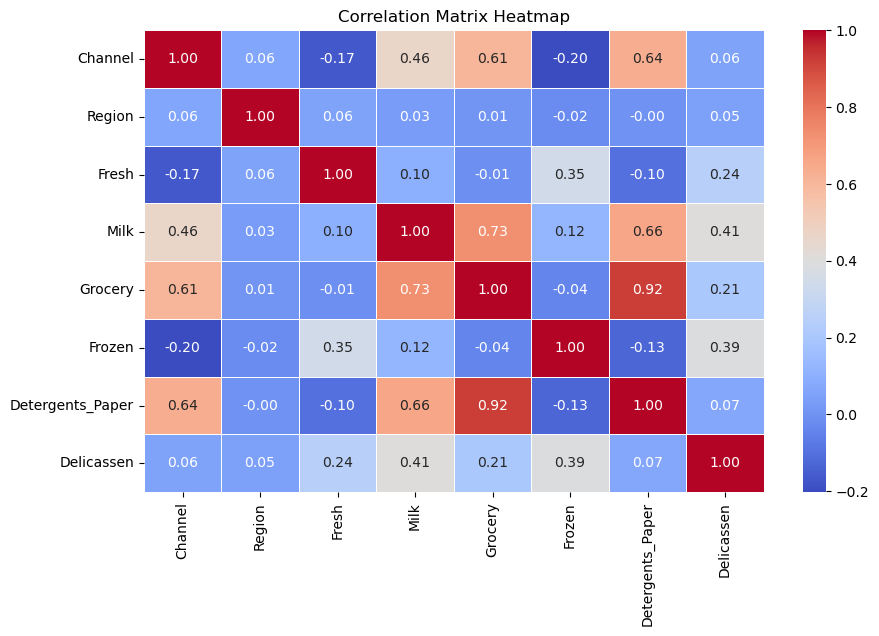

In [131]:
# Heatmap for correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

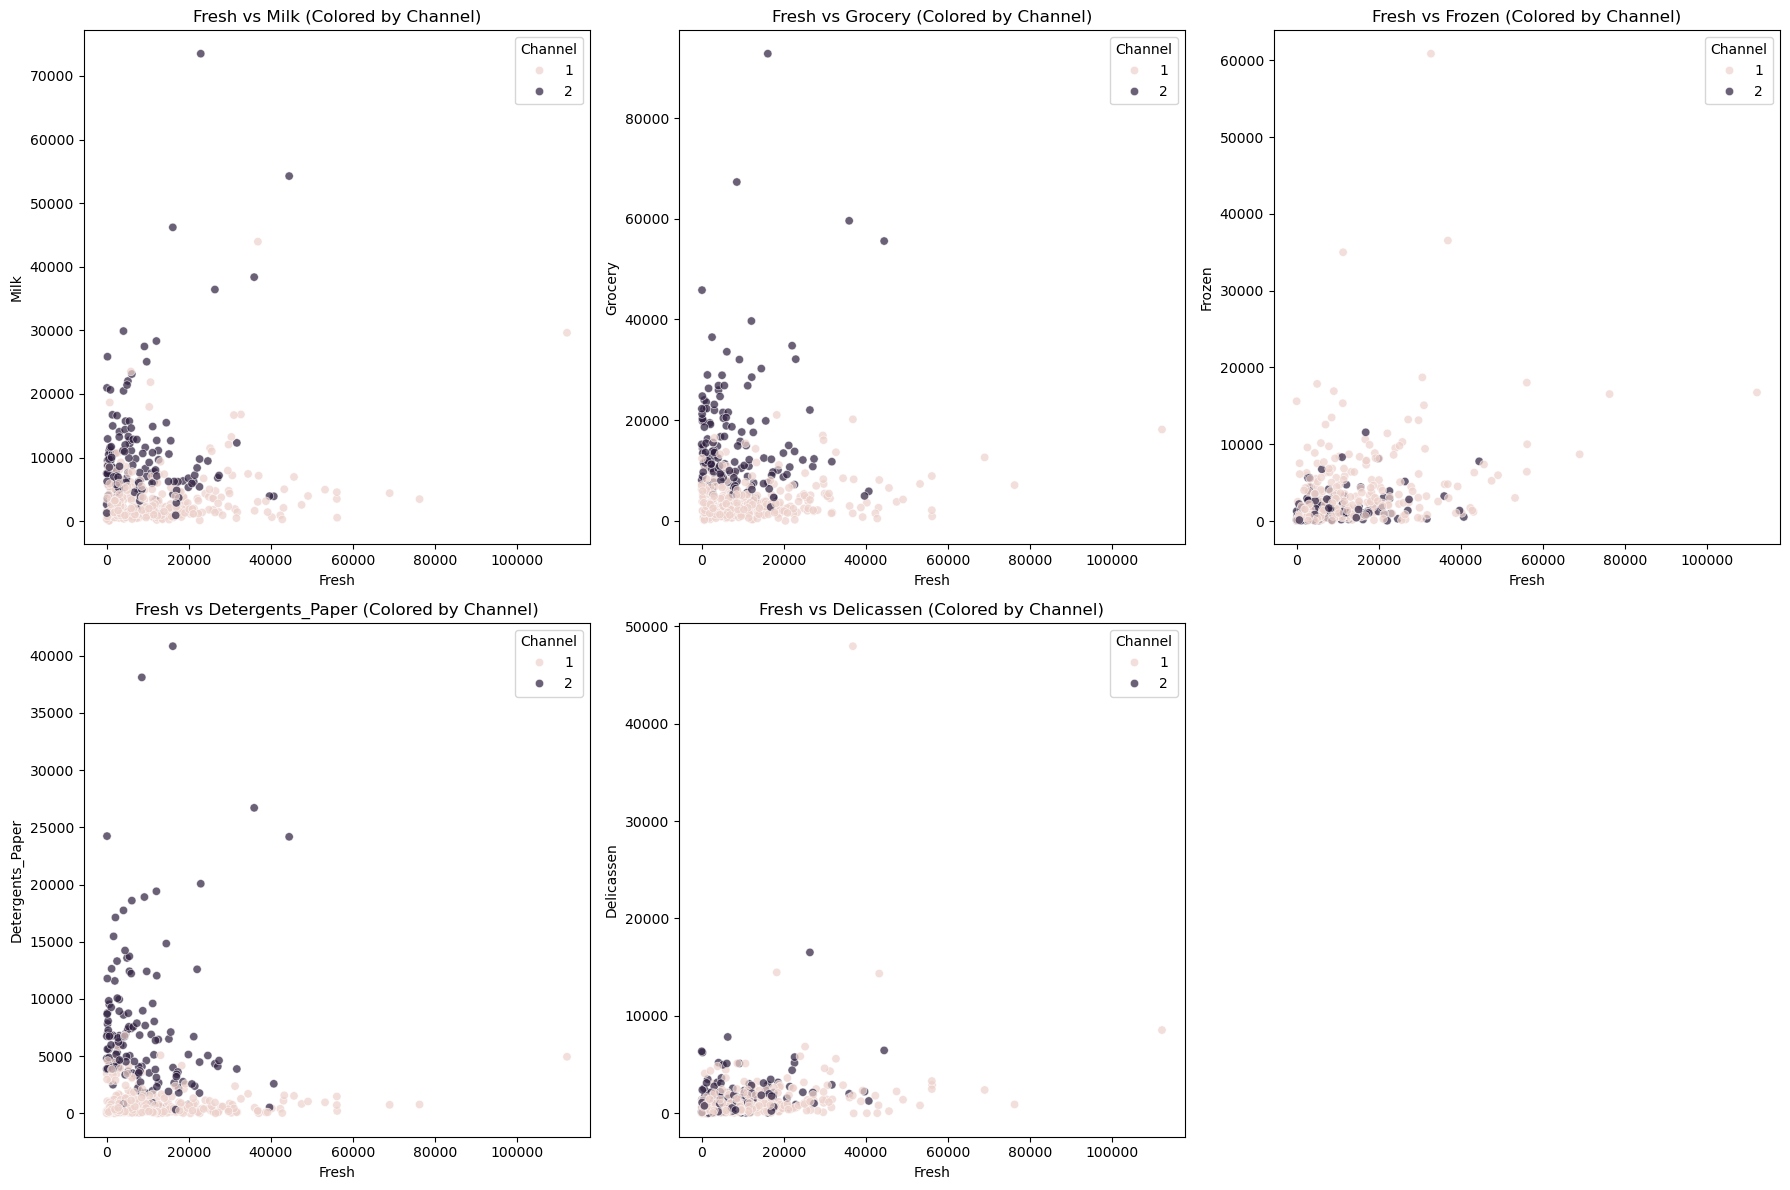

In [132]:
# List of features to compare with 'Fresh'
features = ['Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Scatter Plots: Fresh vs Other Features (Colored by Channel)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, feature in enumerate(features):
    row, col = divmod(i, 3)
    sns.scatterplot(x=df['Fresh'], y=df[feature], hue=df['Channel'], alpha=0.7, ax=axes[row, col])
    axes[row, col].set_title(f"Fresh vs {feature} (Colored by Channel)")
    axes[row, col].set_xlabel("Fresh")
    axes[row, col].set_ylabel(feature)

# Remove extra subplot if necessary
fig.delaxes(axes[1, 2])
plt.tight_layout()
plt.show()

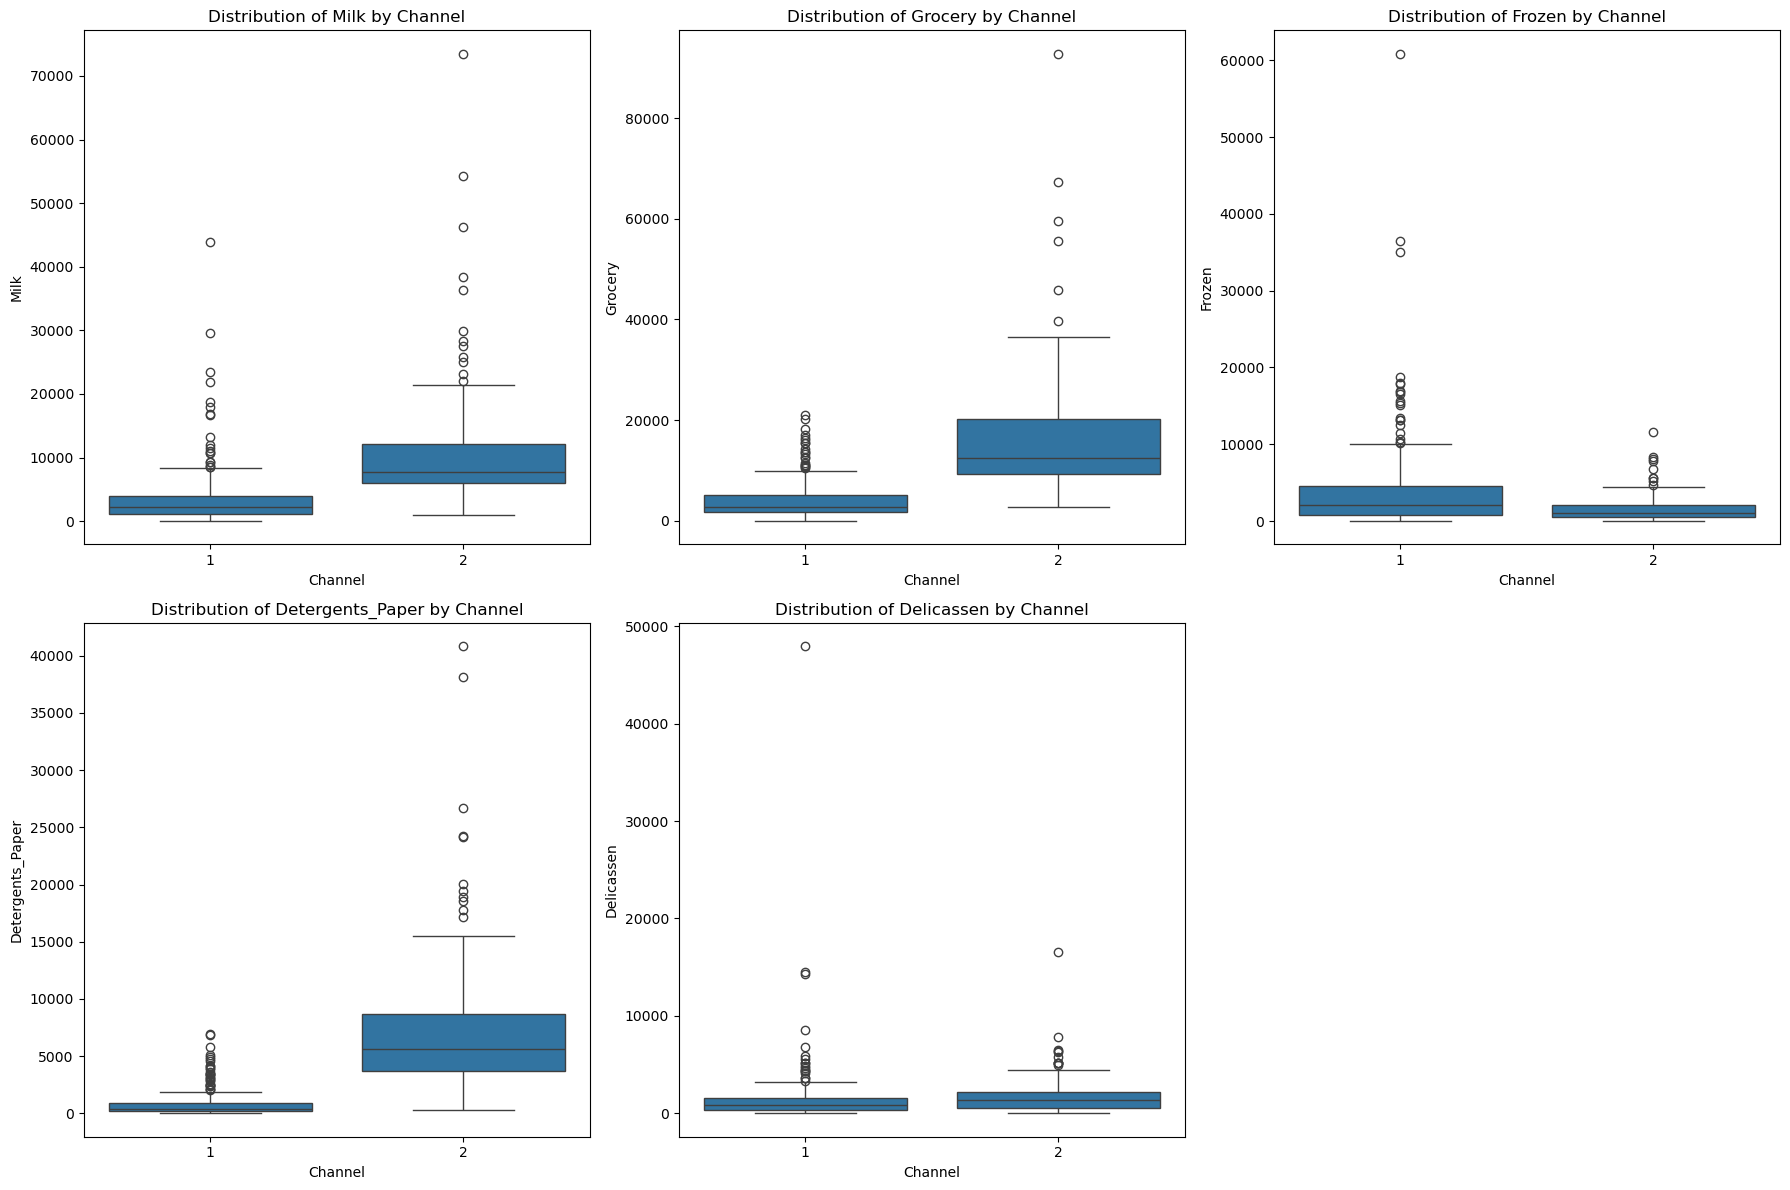

In [133]:
# Boxplots: Fresh grouped by other features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, feature in enumerate(features):
    row, col = divmod(i, 3)
    sns.boxplot(x=df['Channel'], y=df[feature], data=df, ax=axes[row, col])
    axes[row, col].set_title(f"Distribution of {feature} by Channel")
    axes[row, col].set_xlabel("Channel")
    axes[row, col].set_ylabel(feature)

# Remove extra subplot if necessary
fig.delaxes(axes[1, 2])
plt.tight_layout()
plt.show()

In [134]:
# Dropping Region
df_clean = df.drop(columns=['Region'])

In [135]:
df_clean.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185


In [136]:
# Compute Z-scores
z_scores = np.abs(df.apply(zscore))

# Remove rows where any feature has a Z-score > 3
df_clean = df[(z_scores < 3).all(axis=1)]

In [137]:
df_clean.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,1.314010,2.548309,10711.758454,4871.920290,6814.043478,2549.898551,2373.393720,1237.939614
std,0.464682,0.769475,9819.217756,4555.665546,6456.160715,2916.683284,3208.707909,1217.399162
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3063.250000,1477.750000,2116.000000,676.750000,252.750000,395.000000
50%,1.000000,3.000000,8040.000000,3530.000000,4528.000000,1447.000000,772.000000,881.000000
75%,2.000000,3.000000,15657.000000,6908.500000,9762.250000,3204.250000,3660.500000,1681.750000
max,2.000000,3.000000,49063.000000,25862.000000,34792.000000,16919.000000,17120.000000,7844.000000


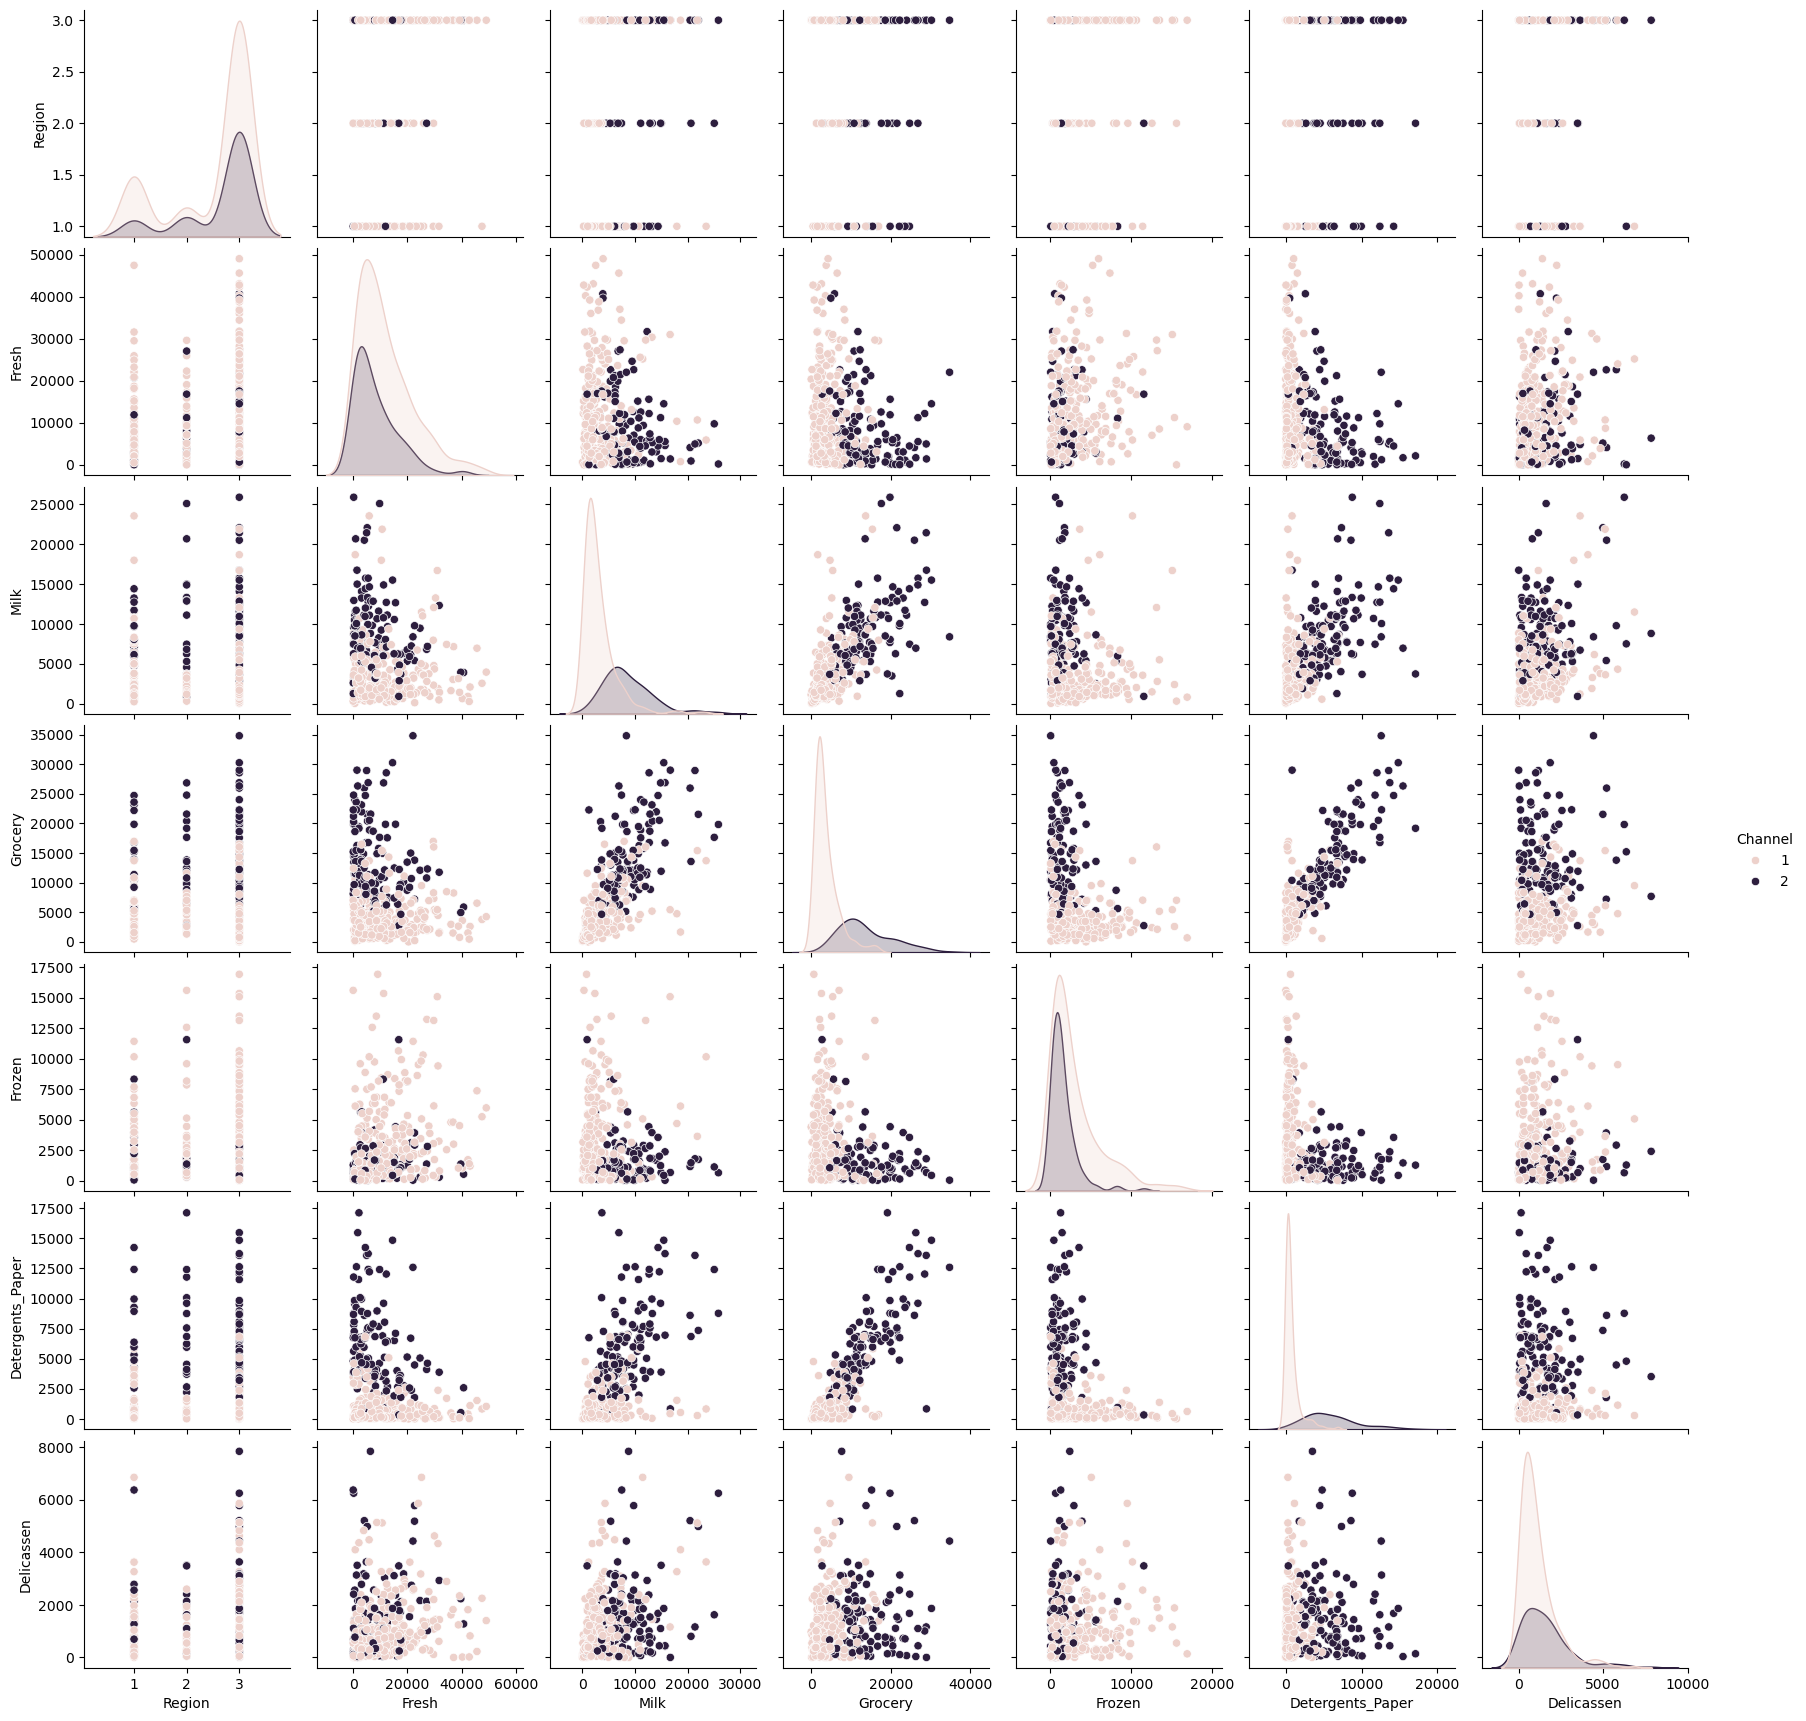

In [138]:
# Pairplot to check relationships between features, colored by 'Channel'
sns.pairplot(df_clean, hue="Channel", diag_kind="kde")
plt.show()

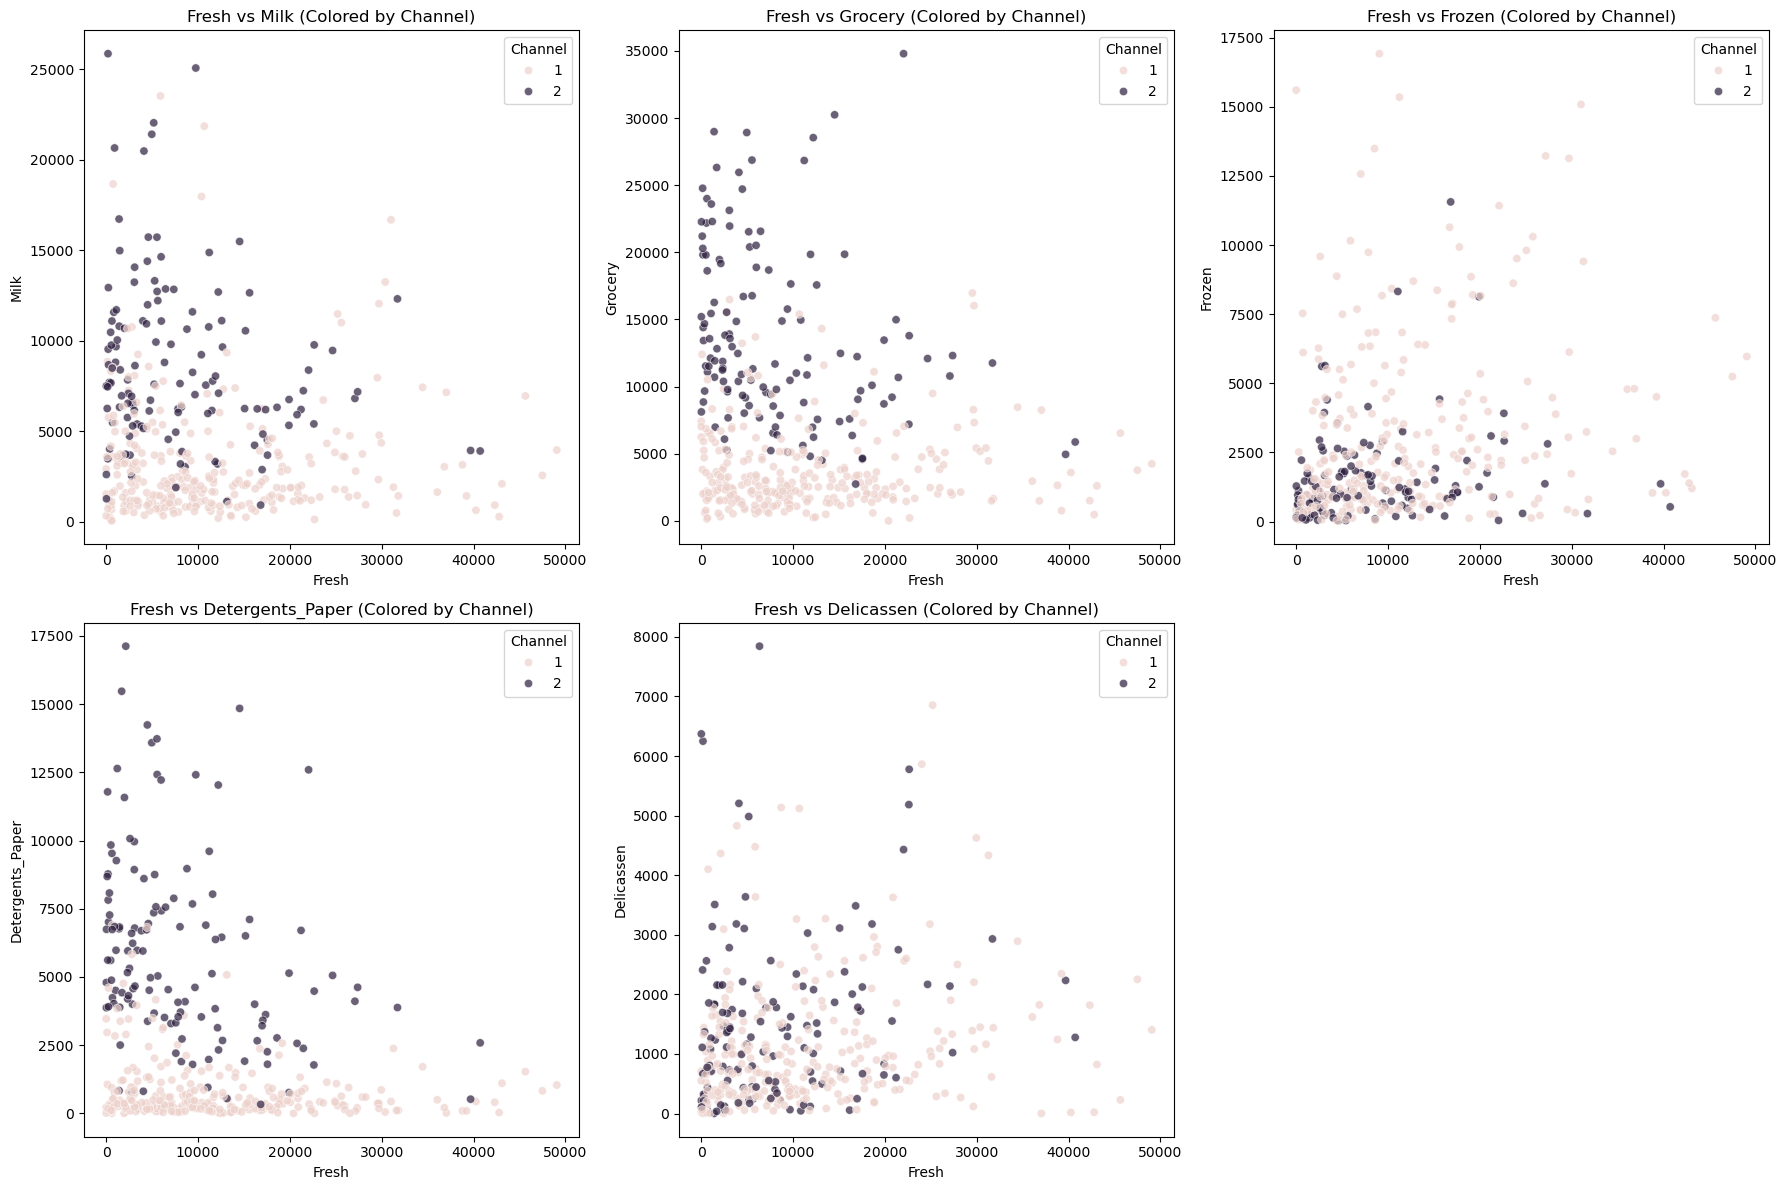

In [139]:
# List of features to compare with 'Fresh'
features = ['Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Scatter Plots: Fresh vs Other Features (Colored by Channel)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, feature in enumerate(features):
    row, col = divmod(i, 3)
    sns.scatterplot(x=df_clean['Fresh'], y=df_clean[feature], hue=df_clean['Channel'], alpha=0.7, ax=axes[row, col])
    axes[row, col].set_title(f"Fresh vs {feature} (Colored by Channel)")
    axes[row, col].set_xlabel("Fresh")
    axes[row, col].set_ylabel(feature)

# Remove extra subplot if necessary
fig.delaxes(axes[1, 2])
plt.tight_layout()
plt.show()

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [140]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

c:\anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

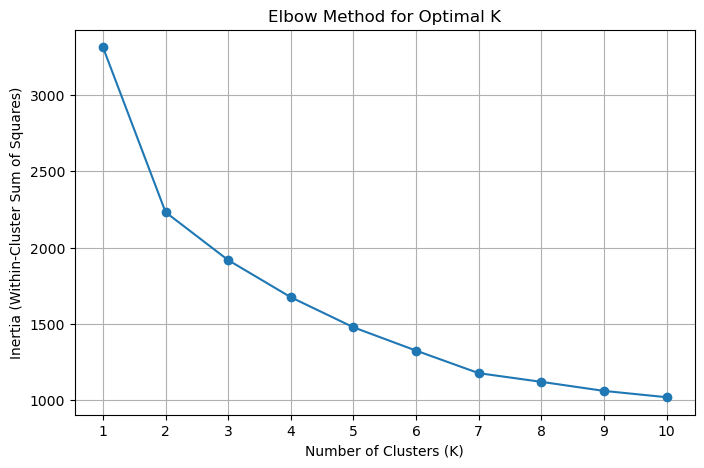

In [141]:
# Standardizing the cleaned dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean)

# Finding the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)  # Checking K values from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)  # Inertia measures within-cluster sum of squares

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_values)
plt.grid(True)
plt.show()

c:\anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\anaconda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

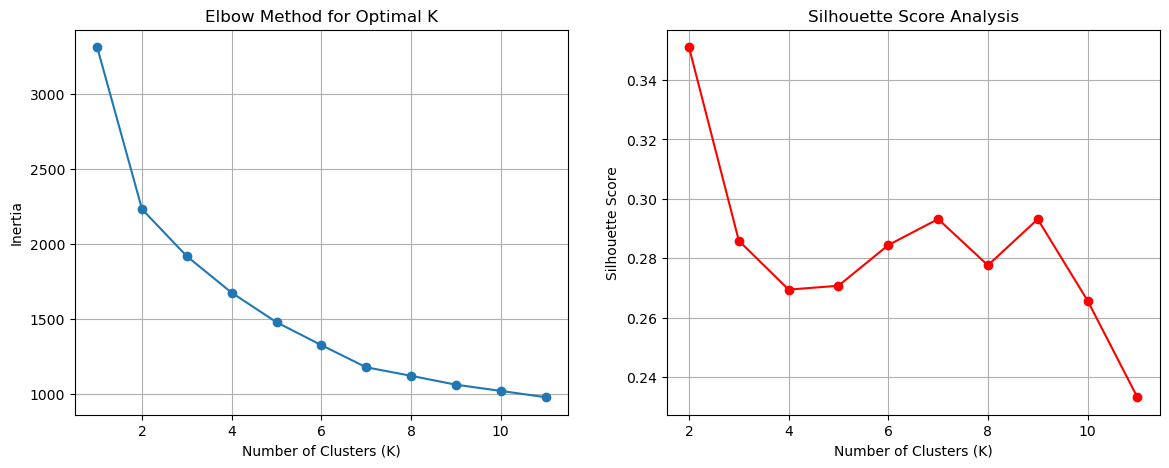

In [145]:
# Range of K values to test (from 1 to 11)
k_values = range(1, 12)

# Store inertia and silhouette scores
inertia = []
silhouette_scores = []

# Running K-Means for each K
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    
    # Append inertia (sum of squared distances to nearest centroid)
    inertia.append(kmeans.inertia_)
    
    # Compute silhouette score (except for K=1, since silhouette score requires at least 2 clusters)
    if k > 1:
        silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(None)  # Placeholder for K=1

# Plotting Inertia and Silhouette Score
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow Method plot (Inertia)
axes[0].plot(k_values, inertia, marker='o', linestyle='-')
axes[0].set_xlabel('Number of Clusters (K)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method for Optimal K')
axes[0].grid(True)

# Silhouette Score plot (excluding K=1)
axes[1].plot(k_values[1:], silhouette_scores[1:], marker='o', linestyle='-', color='red')
axes[1].set_xlabel('Number of Clusters (K)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score Analysis')
axes[1].grid(True)

plt.show()


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

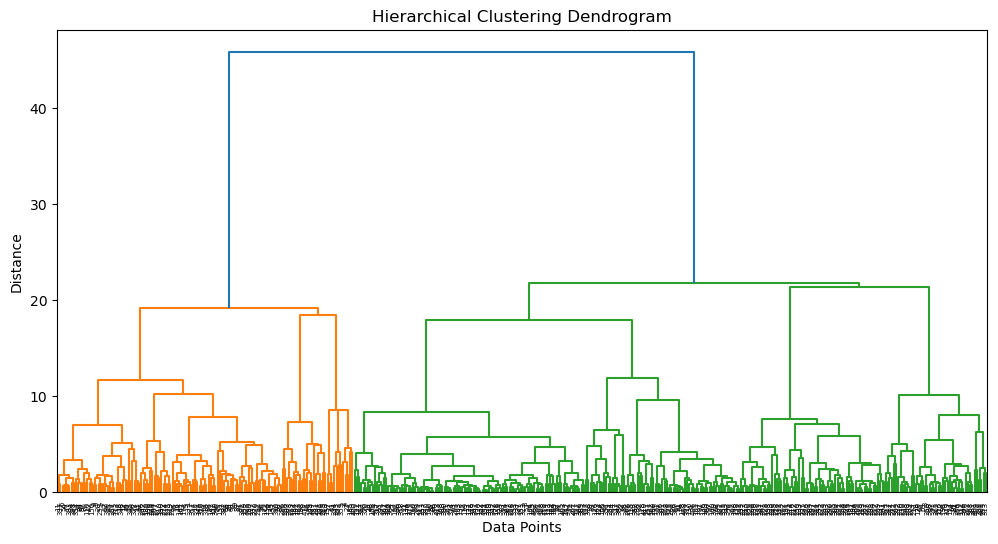

In [154]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Perform hierarchical clustering using Ward's method (minimizes variance within clusters)
linkage_matrix = linkage(df_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


# Part IV - PCA

In [148]:
from sklearn.decomposition import PCA

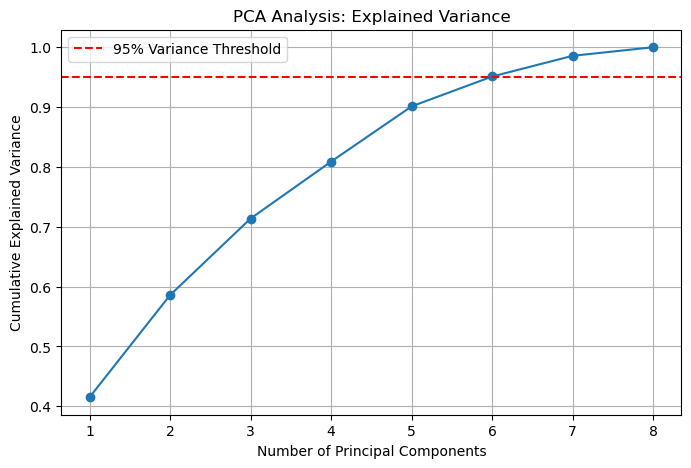

   Principal Component  Explained Variance  Cumulative Variance
0                    1            0.415155             0.415155
1                    2            0.170685             0.585840
2                    3            0.127935             0.713775
3                    4            0.095176             0.808951
4                    5            0.092234             0.901186
5                    6            0.049896             0.951081
6                    7            0.034583             0.985664
7                    8            0.014336             1.000000

Optimal number of components to retain 95% variance: 6

Transformed dataset with optimal principal components:
        PC1       PC2       PC3       PC4       PC5       PC6
0  1.384143 -0.011762  0.800682 -0.427851  0.321643  0.022899
1  1.715837  0.173755  0.551540 -0.089380 -0.343864 -0.167707
2  2.279031  3.137040  0.212335 -2.829595 -2.663128 -1.667508
3 -1.340837  1.007456  0.326574  0.581348 -0.591814 -0.418753
4 

In [160]:
# Assuming df_scaled is a NumPy array (scaled dataset)
# Initialize PCA to keep all components
pca = PCA(n_components=None)  
pca.fit(df_scaled)  # Fit PCA to the scaled data

# Explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Convert PCA results into a DataFrame
pca_results = pd.DataFrame({
    "Principal Component": np.arange(1, len(explained_variance) + 1),
    "Explained Variance": explained_variance,
    "Cumulative Variance": cumulative_variance
})

# Plot cumulative explained variance to decide number of components
plt.figure(figsize=(8, 5))
plt.plot(pca_results["Principal Component"], pca_results["Cumulative Variance"], marker='o', linestyle='-')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')  # Mark 95% explained variance
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Analysis: Explained Variance")
plt.legend()
plt.grid(True)
plt.show()

# Print PCA explained variance table
print(pca_results)

# Choosing the number of components (e.g., keep components covering 95% variance)
n_components_optimal = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nOptimal number of components to retain 95% variance: {n_components_optimal}")

# Transform data into principal components (reduce dimensions)
pca_final = PCA(n_components=n_components_optimal)
df_pca = pca_final.fit_transform(df_scaled)

# Convert transformed PCA data into DataFrame
df_pca = pd.DataFrame(df_pca, columns=[f"PC{i+1}" for i in range(n_components_optimal)])

# Print final transformed dataset with reduced dimensions
print("\nTransformed dataset with optimal principal components:")
print(df_pca.head())

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

### **Key Findings from PCA & Clustering Analysis**
- **PCA Reduced Dimensionality Effectively:**  
  The first 5 to 6 principal components captured **90-95% of the variance**, allowing us to reduce the dataset while preserving most of the information.

- **7 Clusters Show the Best Separation:**  
  Both the **Elbow Method and Silhouette Score** suggested that **K=7** is an optimal choice, balancing within-cluster variance and separation quality.

- **Hierarchical & K-Means Clustering Align Well:**  
  The **hierarchical dendrogram and K-Means clustering results** showed **consistent patterns**, reinforcing that **7 distinct product groups** exist in the dataset.

- **Clusters Can Be Interpreted Based on Product Attributes:**  
  Some clusters are dominated by **fresh products**, while others have **higher grocery or detergent-paper sales**, indicating **logical groupings of similar products**.
